In [262]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import spacy
import seaborn as sns
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nbformat
import plotly.express as px
import hdbscan

In [31]:
from nltk import *

In [38]:
with open('sentences.json', 'r') as f:
    data = json.load(f)


# Uso de la bibilioteca NLTK y SPACY

In [21]:
nltk.download('popular')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
print(stop_words)
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\cmari\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\cmari\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\cmari\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\cmari\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\cmari\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\cmari\AppData\Roaming\nl

{'am', 'an', "isn't", 'what', 'down', 'isn', 'by', 'mustn', 'we', 'doing', 'don', 'had', 'to', 'nor', "hadn't", 'do', 'more', 'during', 'some', 'which', 'as', "she's", 'such', "mustn't", "couldn't", 'hasn', 'or', 'for', 'before', 'after', 'off', "won't", 'than', 'ain', "that'll", "needn't", 'why', 'further', 'whom', 'does', 'where', "weren't", 'most', 'itself', 'those', 'about', 'she', 'against', 'how', 'between', "didn't", 'is', 've', 'theirs', "doesn't", 'until', 's', "hasn't", 'themselves', 'very', "you're", 'who', 'through', 'been', "wouldn't", "you'll", "wasn't", 'needn', 'this', "don't", 'was', "it's", 'over', 'too', 'and', 'again', 'o', 'any', 'once', 'its', 'below', 'these', 'each', "shan't", 'did', 'i', 'are', 'all', 'him', 'when', 'no', 'shouldn', 'hadn', 'the', 'y', "you'd", 'himself', 'their', 'not', 'will', 'd', 'yourself', 'own', 'ma', 'on', 'her', 'll', 'at', 'just', 'only', 'other', "shouldn't", 'can', 'me', 'while', 'aren', 'a', 'have', 'his', 'in', 'both', "haven't", 

### Primeros pasos

Relizamos la tokenización de una de las oraciones como ejemplo, y vemos como la libraría NLTK nos clasifica cada uno de los tokens según sean sustantivo, indicativo de posesivo, etc

In [61]:
ejemplo = data[0]
print(ejemplo)
tokens = nltk.word_tokenize(ejemplo)
tag = nltk.pos_tag(tokens)
tag

The dragonfly's wings sparkled like gemstones in the sunlight.


[('The', 'DT'),
 ('dragonfly', 'NN'),
 ("'s", 'POS'),
 ('wings', 'NNS'),
 ('sparkled', 'VBD'),
 ('like', 'IN'),
 ('gemstones', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('sunlight', 'NN'),
 ('.', '.')]

Para extraer la raíz de cada una de las palabras, podemos utilizar WordNetLemmatizer

In [44]:
lema_ejemplo = [lemmatizer.lemmatize(token.lower()) for token in tokens]
lema_ejemplo

['the',
 'dragonfly',
 "'s",
 'wing',
 'sparkled',
 'like',
 'gemstone',
 'in',
 'the',
 'sunlight',
 '.']

En nuestro caso, ha convertido las palabras que estaban en plural al singular, pero podría haber cambiado tamibién derivaciones de palabras. Veamos como realizar la tokenización de las palabras usando la librería spacy and y el modelo "en_core_web_sm" y la diferencia frente a NLTK

In [63]:
tokenizador = spacy.load("en_core_web_sm")

In [65]:
ejemplo2 = "The striped bats are hanging on their feet for best."
tokens2 = nltk.word_tokenize(ejemplo2)
lemma = [lemmatizer.lemmatize(token.lower()) for token in tokens2]
tokens3 = tokenizador(ejemplo2)
lemma3 = [token.lemma_ for token in tokens3]
print(lemma)
print(lemma3)


['the', 'striped', 'bat', 'are', 'hanging', 'on', 'their', 'foot', 'for', 'best', '.']
['the', 'stripe', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'good', '.']


In [84]:
print(stop_words)

{'am', 'an', "isn't", 'what', 'down', 'isn', 'by', 'mustn', 'we', 'doing', 'don', 'had', 'to', 'nor', "hadn't", 'do', 'more', 'during', 'some', 'which', 'as', "she's", 'such', "mustn't", "couldn't", 'hasn', 'or', 'for', 'before', 'after', 'off', "won't", 'than', 'ain', "that'll", "needn't", 'why', 'further', 'whom', 'does', 'where', "weren't", 'most', 'itself', 'those', 'about', 'she', 'against', 'how', 'between', "didn't", 'is', 've', 'theirs', "doesn't", 'until', 's', "hasn't", 'themselves', 'very', "you're", 'who', 'through', 'been', "wouldn't", "you'll", "wasn't", 'needn', 'this', "don't", 'was', "it's", 'over', 'too', 'and', 'again', 'o', 'any', 'once', 'its', 'below', 'these', 'each', "shan't", 'did', 'i', 'are', 'all', 'him', 'when', 'no', 'shouldn', 'hadn', 'the', 'y', "you'd", 'himself', 'their', 'not', 'will', 'd', 'yourself', 'own', 'ma', 'on', 'her', 'll', 'at', 'just', 'only', 'other', "shouldn't", 'can', 'me', 'while', 'aren', 'a', 'have', 'his', 'in', 'both', "haven't", 

Observamos que gracias al modelo cargado, los verbos son convertidos a su forma en infinitivo así como los adjetivos son transformados a la palabra raíz (best -> good)

Pasamos ahora a analizar las frases de nuestro documento, eliminando también las palabras que se encuentran en el conjunto "stop_words", el cual se trata de palabras genéricas que no son relevantes para dicho análisis

In [99]:
f = 'the dragonfly wing sparkled like gemstone sunlight'
tokens = word_tokenize(f)
for token in tokens:
    print(token.isalpha() and token not in stop_words)

False
True
True
True
True
True
True


In [134]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokens)

processed_phrases = [preprocess(phrase) for phrase in data]
print(processed_phrases)

['dragonfly wing sparkled like gemstone sunlight', 'bagpipe adorned tartan pattern honoring scottish tradition', 'fur pattern tiger striking intimidating', 'triangle simple required precise timing', 'sequoia tree tall seemed touch sky', 'microchip small could embedded skin', 'mimosa plant responded touch folding leaf', 'porcupine quill could detach threatened', 'dandelion seed head formed delicate sphere ready carried away wind', 'origami crane minute intricately folded', 'didgeridoo produced haunting sound deeply rooted aboriginal culture', 'virtual reality headset offered immersive experience', 'petal rose arranged perfect symmetry', 'pickup truck toolbox rack carrying lumber', 'dolphin streamlined shape made look graceful water', 'octopus remarkable intelligence solving puzzle easily', 'length train seemed stretch horizon', 'tuba large required seat orchestra', 'sitar complex architecture made visually fascinating', 'carnivorous pitcher plant lured insect deadly trap', 'quilt kaleid

Una vez procesadas las frases podemos observar alguna distribución de las palabras para luego vectorizarlas

### Distribución de frecuencias

In [69]:
from nltk.probability import FreqDist

In [117]:
tokens = []
for phrase in processed_phrases:
    tokens.extend(word_tokenize(phrase))

Podemos visualizar de esta manera la frecuencia de las palabras mediante un gráfico

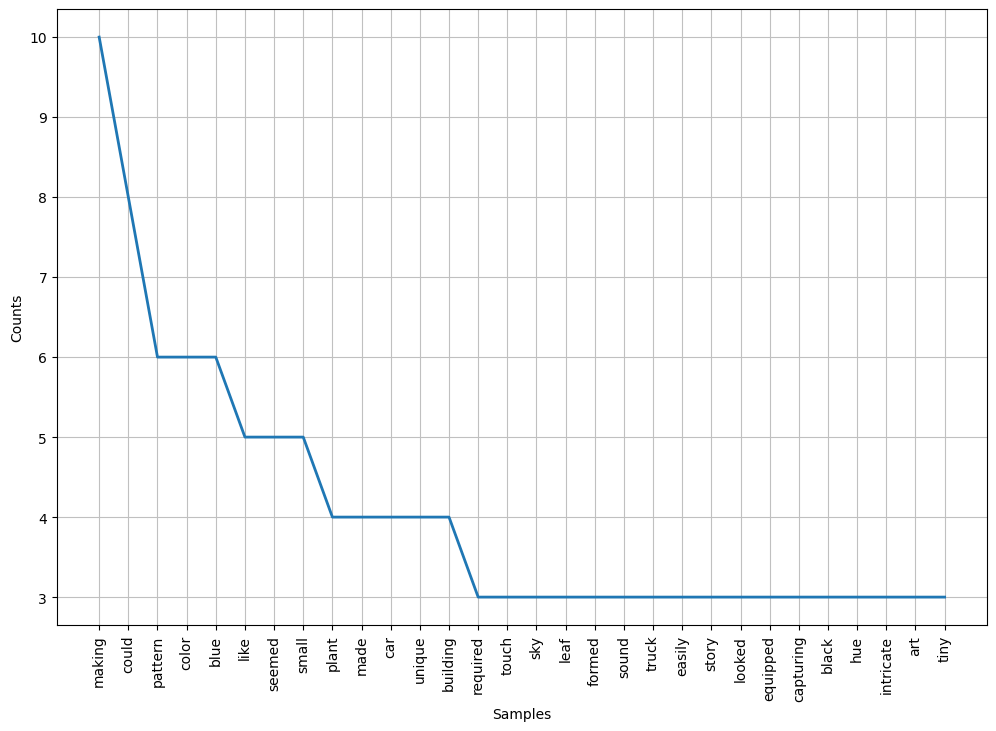

In [114]:
freq = FreqDist(tokens)
plt.figure(figsize=(12, 8))
freq.plot(30, cumulative=False)
plt.show()


Gracias a este gráfico nos podemos hacer una idea de los principales temas que se tratan en las oraciones de ejemplo, aunque está lejos de ser esencial para el análisis

In [133]:
print("Palabra mas frecuentada:", freq.max(), "\nNúmero de tokens totales:", freq.N())

Palabra mas frecuentada: making 
Número de tokens totales: 649


Para visualizar de forma más gráfica esto, podríamos dibujar un worldCloud de la siguiente forma

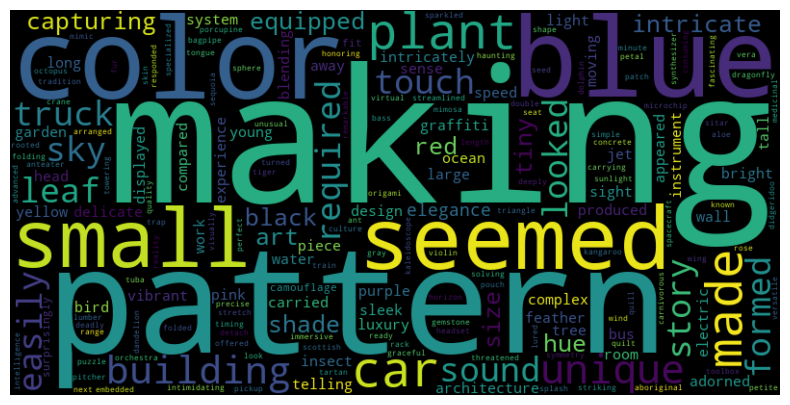

In [136]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Vectorización de textos (TF-IDF)

Hemos utilizado TfidfVectorizer para poder vectorizar cada una de las frases en base a las palabras que tenga. (TF se refiere a la frecuencia y DF a la frecuencia de documento inversa)

In [192]:
vectorizer = TfidfVectorizer(smooth_idf=True)
vec = vectorizer.fit_transform(processed_phrases)
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

vector = vectorizer.transform(processed_phrases)
print(vector.shape)
print(vector.toarray())

{'dragonfly': 130, 'wing': 490, 'sparkled': 403, 'like': 246, 'gemstone': 186, 'sunlight': 428, 'bagpipe': 36, 'adorned': 7, 'tartan': 438, 'pattern': 307, 'honoring': 208, 'scottish': 367, 'tradition': 452, 'fur': 183, 'tiger': 443, 'striking': 424, 'intimidating': 220, 'triangle': 457, 'simple': 387, 'required': 351, 'precise': 332, 'timing': 445, 'sequoia': 375, 'tree': 456, 'tall': 436, 'seemed': 372, 'touch': 450, 'sky': 393, 'microchip': 265, 'small': 396, 'could': 100, 'embedded': 144, 'skin': 392, 'mimosa': 268, 'plant': 324, 'responded': 354, 'folding': 176, 'leaf': 242, 'porcupine': 329, 'quill': 340, 'detach': 123, 'threatened': 442, 'dandelion': 112, 'seed': 371, 'head': 203, 'formed': 177, 'delicate': 119, 'sphere': 407, 'ready': 346, 'carried': 71, 'away': 33, 'wind': 488, 'origami': 298, 'crane': 104, 'minute': 272, 'intricately': 222, 'folded': 175, 'didgeridoo': 124, 'produced': 334, 'haunting': 202, 'sound': 400, 'deeply': 117, 'rooted': 361, 'aboriginal': 0, 'culture

Otra forma de poder realizarllo es usando CountVectorizer(), aunque dado que no dispongo de más tiempo, sigamos analizando partiendo de esta vectorización.

## Análisis de sentimientos

Para esta sección, hacemos uso de TextBlob, que nos proporciona una métrica en función de la semántica de la oración.  Veamos dos ejemplos con significados contrarios y fijemonos en los campos de Sentiment

In [194]:
example = "I really love chocolate"
example2 = "I hate chocolate"

#Veamos como varía en función de la oración
blob = TextBlob(example)
blob2 = TextBlob(example2)

print(blob.sentiment)
print(blob2.sentiment)

Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=-0.8, subjectivity=0.9)


Observamos como la primera es clasificada positivamente dada la connotación positiva del verbo 'love', mientras que la segunda es clasificada negativamente por la connotación negativa del verbo 'hate'

Dejamos el análisis de sentimientos de todo el conjunto de frases procesadas

In [193]:
def sentiment_analysis(phrase):
    blob = TextBlob(phrase)
    return blob.sentiment

sentiments = [sentiment_analysis(phrase) for phrase in data]

analysis_summary = {
    'processed_phrases': processed_phrases,
    'sentiments': sentiments
}

print(analysis_summary)


{'processed_phrases': ['dragonfly wing sparkled like gemstone sunlight', 'bagpipe adorned tartan pattern honoring scottish tradition', 'fur pattern tiger striking intimidating', 'triangle simple required precise timing', 'sequoia tree tall seemed touch sky', 'microchip small could embedded skin', 'mimosa plant responded touch folding leaf', 'porcupine quill could detach threatened', 'dandelion seed head formed delicate sphere ready carried away wind', 'origami crane minute intricately folded', 'didgeridoo produced haunting sound deeply rooted aboriginal culture', 'virtual reality headset offered immersive experience', 'petal rose arranged perfect symmetry', 'pickup truck toolbox rack carrying lumber', 'dolphin streamlined shape made look graceful water', 'octopus remarkable intelligence solving puzzle easily', 'length train seemed stretch horizon', 'tuba large required seat orchestra', 'sitar complex architecture made visually fascinating', 'carnivorous pitcher plant lured insect deadl

# Custering de las oraciones

Para comenzar, veamos que tal podemos abordar este problema de Unsupervised Learning, dado que no tenemos las oraciones labelizadas. Vamos a empezar usando el conocido algoritmo KNN, para agrupar en un número determinado de clusteres las oraciones de nuestro ejemplo

Tras varias pruebas realizadas, observamos que siempre hay uno de los clusteres que agrupa a la gran mayoría de las oraciones por lo que nos decantamos finalmente en dejar 3 clusteres distintos

Más tarde analizaremos en base a los clusteres las razones por la cual se han agrupado de dicha forma

<Axes: xlabel='count'>

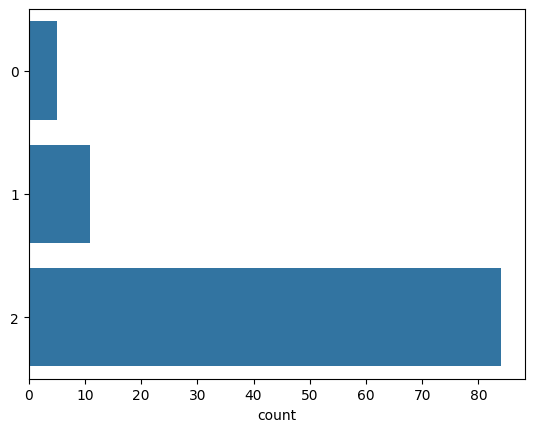

In [206]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42,init='random')
kmeans.fit(vector)
labels = kmeans.labels_
sns.countplot(y=labels)

Podemos ver donde se encuentra el centro de uno de los clusteres

In [208]:
print(kmeans.cluster_centers_[0])

[0.         0.         0.08485145 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.08737214 0.         0.         0.         0.06845309 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08124382 0.         0.         0.07967324
 0.         0.         0.         0.         0.         0.08017455
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08017455 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.08485145 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

Para imaginarnos mejor como se distribuyen, apliquemos PCA para reducir la dimensionalidad de nuestras variables y así poder dibujarlas en el plano

In [209]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(vector.toarray())

Aplicamos primero PCA para 2 dimensiones (algo que es un poco desastre, dado el tamaño de cada una de las variables y que ya veremos que tiene su consecuencia)

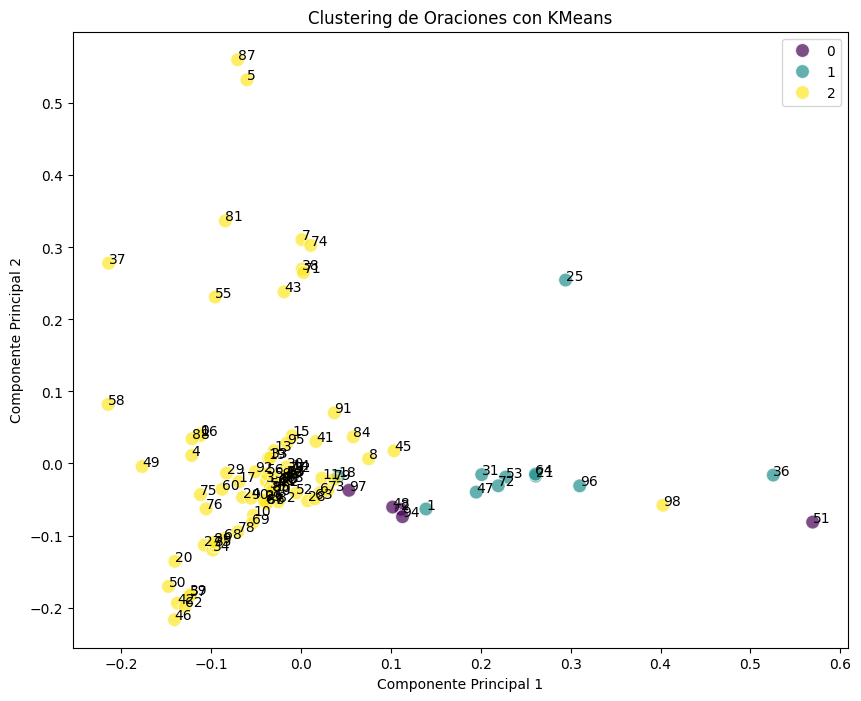

In [210]:
df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df['Cluster'] = labels
df['Sentence'] = processed_phrases


plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
for i in range(df.shape[0]):
    plt.text(df['PC1'][i], df['PC2'][i], str(i))
plt.title('Clustering de Oraciones con KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

Observamos como existe una gran cantidad de oraciones que se clasifican en un mismo clúster y que se agrupan entorno a una zona concreta del plano. Sí que es verdad que los otros clusteres están repartidos pero que la representación no simbolice los clústeres es algo lógico dado la cantidad de dimensiones que hemos pretendido reducir

Probemos ahora a reducir a 3 dimensiones

In [211]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(vector.toarray())

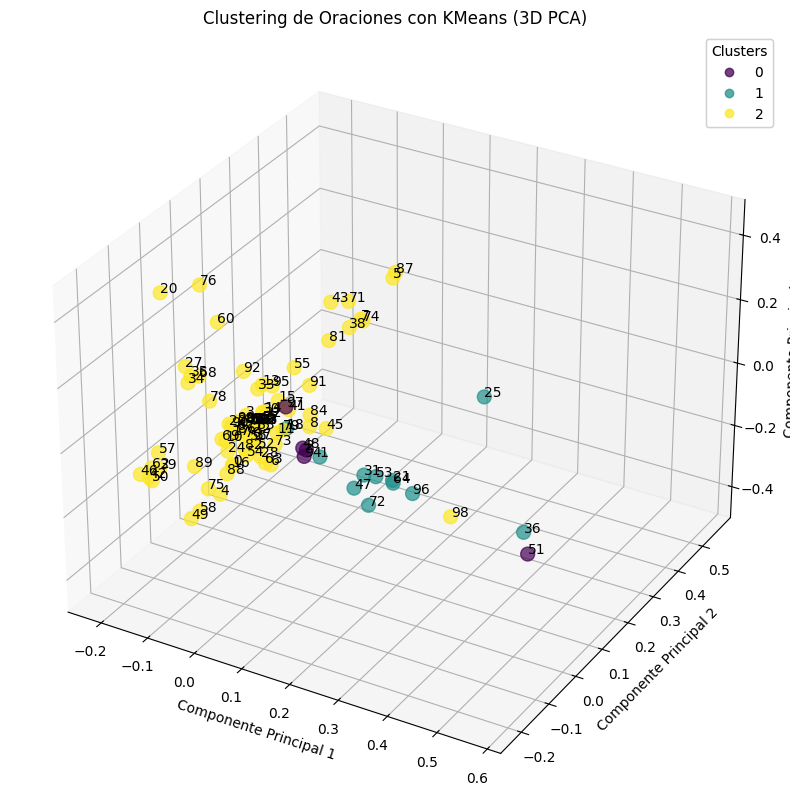

In [212]:
df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df['Cluster'] = labels
df['Sentence'] = processed_phrases


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

for i in range(df.shape[0]):
    ax.text(df['PC1'][i], df['PC2'][i], df['PC3'][i], str(i))

ax.set_title('Clustering de Oraciones con KMeans (3D PCA)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

plt.show()

Gracias a esta visualización podemos percatarnos que dos de los clusteres estan en cierta medidas correctos, dado la clasificación obtenida por la vectorización realizada. No es representativo pero nos acerca algo más a nuestro objetivo

Vemos realmente cuales son las oraciones de cada cluster y busquemos esos patrones en los que se ha basado

In [213]:
clusters = {}
for idx, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(data[idx])

for cluster, sentences in clusters.items():
    print(f"Cluster {cluster}:")
    for sentence in sentences:
        print(f" - {sentence}")
    print("\n")


motivos = {
    0: "Frases 0",
    1: "Frases 1",
    2: "Frases 2",
}

rows = []
for cluster, sentences in clusters.items():
    for sentence in sentences:
        rows.append([cluster, sentence, motivos[cluster]])

df = pd.DataFrame(rows, columns=["Cluster", "Sentence", "Motivo"])


csv_path = 'Knnclusters.csv'
df.to_csv(csv_path, index=False)


Cluster 2:
 - ['dragonfli', 'wing', 'sparkl', 'like', 'gemston', 'sunlight']
 - ['triangl', 'simpl', 'requir', 'precis', 'time']
 - ['sequoia', 'tree', 'tall', 'seem', 'touch', 'sky']
 - ['microchip', 'small', 'could', 'embed', 'skin']
 - ['mimosa', 'plant', 'respond', 'touch', 'fold', 'leav']
 - ['porcupin', 'quill', 'could', 'detach', 'threaten']
 - ['dandelion', 'seed', 'head', 'form', 'delic', 'sphere', 'readi', 'carri', 'away', 'wind']
 - ['origami', 'crane', 'minut', 'intric', 'fold']
 - ['didgeridoo', 'produc', 'haunt', 'sound', 'deepli', 'root', 'aborigin', 'cultur']
 - ['virtual', 'realiti', 'headset', 'offer', 'immers', 'experi']
 - ['petal', 'rose', 'arrang', 'perfect', 'symmetri']
 - ['pickup', 'truck', 'toolbox', 'rack', 'carri', 'lumber']
 - ['dolphin', 'streamlin', 'shape', 'made', 'look', 'grace', 'water']
 - ['octopus', 'remark', 'intellig', 'solv', 'puzzl', 'easili']
 - ['length', 'train', 'seem', 'stretch', 'horizon']
 - ['tuba', 'larg', 'requir', 'seat', 'orchestra'

Es curioso observar como las frases del cluster 0 poseen la palabra 'pattern', algo que nos puede dar indicios de la razón por la cual está siendo clasificada. Además, observamos también como las frases del cluster 1 poseen la palabra 'make' así como muchas relativas a arte, instrumentos y música, aunque hay otras que poseen también referencias a estos temas. 

Por último, el resto de las oraciones que están clasificada en el último cluster, el cual es el mas mayoritario, reprenstan diversos temas. En su mayoría, animales y propiedades de estos; lo que nos puede indicar que puede que sea en lo que se ha basado. Aun así, se encuentran también oraciones relativas a la tecnología y otros temas, por lo que para un posible trabajo futuro se podría afinar más la clasificación.

In [219]:
from sklearn.neighbors import NearestNeighbors
k = 5  # Número de vecinos
knn = NearestNeighbors(n_neighbors=k, metric='cosine')
knn.fit(vector)

# Encontrar los vecinos más cercanos para cada vector
distances, indices = knn.kneighbors(vector)

print(len(indices))

100


### Analisis con HDBSCAN

HDBSCAN es un método de clustering basado en distancias variables para separar clústeres

In [250]:
import hdbscan

{0, 1, 2, -1}


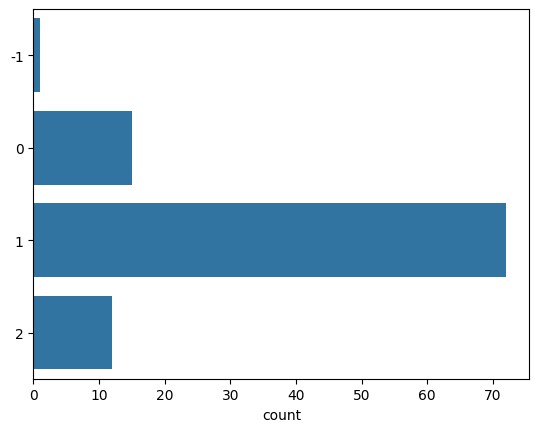

In [261]:
hdbscan_clusterer = hdbscan.HDBSCAN(metric='euclidean', min_cluster_size=3)
labels = hdbscan_clusterer.fit_predict(vector)

unique_labels = set(labels)
print(unique_labels)

df = pd.DataFrame({
    'Frase': processed_phrases,
    'Cluster': labels
})

sns.countplot(y=labels)

df.to_csv('hdbscanCluster.csv', index=False)

Observamos que de forma similar a lo que pasaba cuando utilizabamos el método KNN, la mayoría de las oraciones quedan clasificadas como un sólo cluster. Por otro lado, existen dos clusteres que acumulan el resto de los ejemplos en su mayoría.

Analicemos cómo han sido clasificados: En primer lugar, observamos como el clúster con el número uno recoge en su mayoría las oraciones en relación a animales, aunque también aquellas que se relacionan con los vehículos o con arte.

En el cluster con el número 0 estan en su mayoría las oraciones en relación a la tecnología. Por último, el cluster 2 recoge diversas oraciones en relación a diversos temas. 

## Trabajo futuro

En general, pienso que el análisis ha sido correcto, dejando un trabajo futuro y claro: la mejora en la determinación de los clusteres, y la concreción de los criterios por los cuales estos son clasificados. 

Además, me gustaría haber explorado más los métodos de vectorización tales como LDA o pLSA, y ver las diferencias frente tf-idf, aunque el avance sobre el conocimiento ha sido grande y estoy agradecido por ello